### Download data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

--2022-07-05 08:41:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   395MB/s    in 0.3s    

2022-07-05 08:41:24 (395 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [ ]:
# !ls pizza_steak/test/pizza

In [ ]:
import zipfile 
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os 
hierarchy = os.walk("pizza_steak")
for dirpath, dirnames, filenames in hierarchy:
  print("----")
  print(f"path : {dirpath} dirnames : {dirnames} nb_files : {len(filenames)}")

----
path : pizza_steak dirnames : ['train', 'test'] nb_files : 0
----
path : pizza_steak/train dirnames : ['pizza', 'steak'] nb_files : 0
----
path : pizza_steak/train/pizza dirnames : [] nb_files : 750
----
path : pizza_steak/train/steak dirnames : [] nb_files : 750
----
path : pizza_steak/test dirnames : ['pizza', 'steak'] nb_files : 0
----
path : pizza_steak/test/pizza dirnames : [] nb_files : 250
----
path : pizza_steak/test/steak dirnames : [] nb_files : 250


In [ ]:
# how much training image we have of the pizza category 
len(os.listdir('pizza_steak/train/pizza'))

750

### Visualize some images (Get familiare with your data)

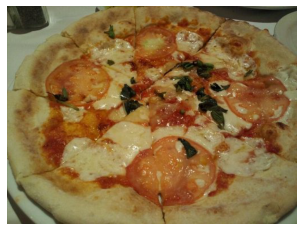

In [ ]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
img = mpimg.imread("/content/pizza_steak/train/pizza/1008104.jpg")
plt.imshow(img)
plt.axis('off'); # <=> plt.axis(False)

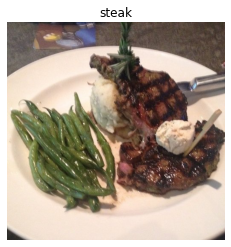

In [ ]:
# Randomly pick an image and visualize it 
import random
def visulaize_data(target_dir, target_class):
  target_path = target_dir + '/' + target_class
  # pick a random image  
  [random_img] = random.sample(os.listdir(target_path), 1)
  full_path = target_path + '/' + random_img
  img = mpimg.imread(full_path)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)
visulaize_data("pizza_steak/train", "steak")

### Preprocessing and labeling our data (X and y variables)

In [ ]:
from tensorflow.keras.preprocessing import image
train_gen = image.ImageDataGenerator(rescale=1/255)
train_scaled = train_gen.flow_from_directory(directory="pizza_steak/train", target_size=(224, 224), class_mode='binary', batch_size=32)

test_gen = image.ImageDataGenerator(rescale=1/255)
test_scaled = train_gen.flow_from_directory(directory="pizza_steak/test", target_size=(224, 224), class_mode='binary', batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


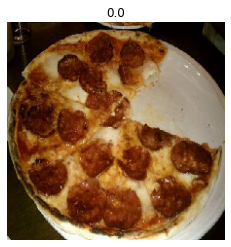

In [ ]:
for batch_imgs, batch_labels in train_scaled:
  plt.imshow(batch_imgs[0])
  plt.title(batch_labels[0])
  plt.axis(False);
  break

# Streak => 1 | pizza => 0 

In [ ]:
len(train_scaled)
(len(os.listdir("pizza_steak/train/pizza")) + len(os.listdir("pizza_steak/train/steak"))) // 32

46

In [ ]:
# train_scaled.class_indices
class_names=["pizza", "steak"]

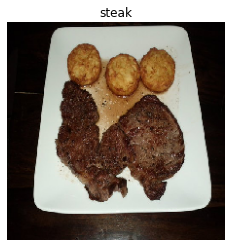

In [ ]:
# using next 
batch_imgs, batch_labels = train_scaled.next()
ind = random.randint(0, 32)
plt.imshow(batch_imgs[ind])
plt.title(class_names[int(batch_labels[ind])])
plt.axis(False);

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

Found 1500 files belonging to 2 classes.
(512, 512, 3)
tf.Tensor([0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1], shape=(32,), dtype=int32)


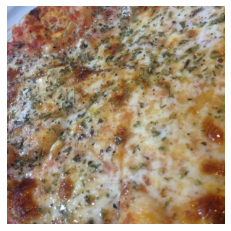

In [ ]:
pizza_train_gen = image_dataset_from_directory('pizza_steak/train', class_names=["pizza", "steak"], image_size=(512, 512))
for img, label in pizza_train_gen:
  print(img[0].shape)
  # why we mkust do this 
  plt.imshow(img[0]/255.)
  plt.axis(False);
  print(label)
  break

### Creating a model

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.losses import binary_crossentropy

In [ ]:
# set random seed 

# Create model 
model = Sequential([
                    # input shape 
           Conv2D(filters=10, kernel_size=3, strides=1, activation='relu', input_shape=(224, 224, 3), padding="same"),
           Flatten(),
           # always remember to put the sigmoid as the activation fnuction for the last layer 
           Dense(1, activation="sigmoid")         
])
# Compile moodel 
model.compile(loss=binary_crossentropy, optimizer=Adam(), metrics=["accuracy"])
# fit model 
history = model.fit(train_scaled, epochs=5, validation_data=test_scaled)

Epoch 1/5
47/47 [==============================] - 9s 189ms/step - loss: 5.5759 - accuracy: 0.6473 - val_loss: 1.2836 - val_accuracy: 0.6860
Epoch 2/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6358 - accuracy: 0.7700 - val_loss: 0.4185 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.3653 - accuracy: 0.8320 - val_loss: 0.4270 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.2653 - accuracy: 0.8933 - val_loss: 0.3770 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.1482 - accuracy: 0.9533 - val_loss: 0.5052 - val_accuracy: 0.7740


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 10)      280       
                                                                 
 flatten_2 (Flatten)         (None, 501760)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 501761    
                                                                 
Total params: 502,041
Trainable params: 502,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_imgs, batch_labels = test_scaled.next()

In [ ]:
pred = model.predict(batch_imgs[0].reshape((1, 224, 224, 3))).squeeze().round()
int(pred) == batch_labels[0]
class_names[int(pred)] 

'steak'

In [ ]:
model.evaluate(train_scaled)
# accuracy almost 1 : overfitting ?

47/47 [==============================] - 6s 133ms/step - loss: 0.1366 - accuracy: 0.9660


[0.1365758180618286, 0.9660000205039978]

In [ ]:
model.evaluate(test_scaled)

16/16 [==============================] - 2s 131ms/step - loss: 0.5052 - accuracy: 0.7740


[0.5052266120910645, 0.7739999890327454]

In [ ]:
batch_pred = model.predict(batch_imgs).round().squeeze().astype(int)
batch_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [ ]:
# calculating the precision for the first batch
from tensorflow.keras.metrics import Precision
pre = Precision()
pre.update_state(y_true=batch_labels, y_pred = batch_pred)
pre.result().numpy()

0.71428573

In [ ]:
sum(batch_pred == batch_labels)

24

In [ ]:
import numpy as np 
index_of_wrong_predictions = np.arange(32)[batch_pred != batch_labels]
index_of_wrong_predictions

array([ 4,  8, 11, 13, 19, 26, 27, 28])

In [ ]:
import matplotlib.pyplot as plt

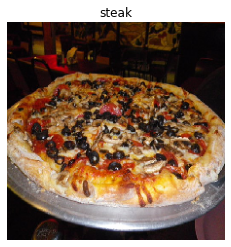

In [ ]:
[ind] = random.sample(list(index_of_wrong_predictions), 1)
img = batch_imgs[ind]
pred = model.predict(img.reshape((1,224,224,3))).squeeze().round().astype(int)
plt.imshow(img)
plt.title(class_names[pred])
plt.axis(False);

In [ ]:
import pandas as pd 

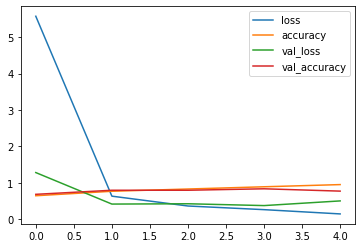

In [ ]:
pd.DataFrame(history.history).plot();

In [ ]:
# set random seed 

# Create model 
model = Sequential([
                    # input shape 
           Conv2D(filters=10, kernel_size=3, strides=1, activation='relu', input_shape=(224, 224, 3), padding="same"),
           Conv2D(filters=10, kernel_size=3, strides=1, activation='relu', padding="same"),
           MaxPool2D(pool_size=2),
           Conv2D(filters=10, kernel_size=3, strides=1, activation='relu', padding="same"),
           Conv2D(filters=10, kernel_size=3, strides=1, activation='relu', padding="same"),
           Conv2D(filters=10, kernel_size=3, strides=1, activation='relu', padding="same"),
           MaxPool2D(pool_size=2),
           Flatten(),
           Dense(1)         
])
# Compile moodel 
model.compile(loss=binary_crossentropy, optimizer=Adam(), metrics=["accuracy"])
# fit model 
history = model.fit(train_scaled, epochs=5, validation_data=test_scaled, verbose=1)

Epoch 1/5
47/47 [==============================] - 10s 198ms/step - loss: 0.8446 - accuracy: 0.5320 - val_loss: 0.6174 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 1.0551 - accuracy: 0.6127 - val_loss: 0.6090 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.5518 - accuracy: 0.7353 - val_loss: 0.4667 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.7071 - accuracy: 0.5913 - val_loss: 0.6944 - val_accuracy: 0.4980
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.6637 - accuracy: 0.6280 - val_loss: 0.6016 - val_accuracy: 0.7440


In [ ]:
preds = model.predict(test_scaled).squeeze().round()

In [ ]:
y_true = test_scaled.labels

In [ ]:
from tensorflow.keras.metrics import Accuracy
acc = Accuracy()
acc.update_state(y_true, preds)
acc.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.52>

In [ ]:
preds = model.predict(test_scaled).squeeze().round()

**texte en gras**

In [ ]:
y_true = []
for i in range(len(test_scaled)):
  batch_imgs, batch_labels = test_scaled.next()
  y_true += batch_labels.tolist()
y_true = np.array(y_true)

In [ ]:
y_true_2 = []
for i in range(len(test_scaled)):
  batch_imgs, batch_labels = test_scaled.next()
  y_true_2 += batch_labels.tolist()
y_true_2 = np.array(y_true_2)

In [ ]:
sum(y_true == y_true_2) # what the hell
# .next change each time see the example below 

247

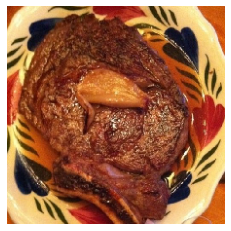

In [ ]:
batch_imgs, batch_labels = test_scaled.next()
plt.imshow(batch_imgs[0])
plt.axis(False);

In [ ]:
len(test_scaled.labels)

500

In [ ]:
y_true = test_scaled.labels

In [ ]:
preds = model.predict(test_scaled).round().squeeze()

In [ ]:
sum(preds == y_true)

266

In [ ]:
sum(preds == y_true)

266

In [ ]:
264 / 500

0.528

In [ ]:
from tensorflow.keras.metrics import Accuracy
acc = Accuracy()
acc.update_state(y_true, preds)
acc.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.532>

In [ ]:
model.evaluate(test_scaled)

16/16 [==============================] - 2s 136ms/step - loss: 0.6016 - accuracy: 0.7440


[0.601593554019928, 0.7440000176429749]

In [ ]:
# why not the same accuracy 

### Predicting a single image 

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2022-07-05 08:47:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-07-05 08:47:50 (212 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



In [ ]:
import tensorflow as tf
encoded_image_bytes = tf.io.read_file("/content/03-pizza-dad.jpeg")

In [ ]:
img = tf.image.decode_image(encoded_image_bytes, channels=3)
img = tf.image.resize(img, size=[224, 224])

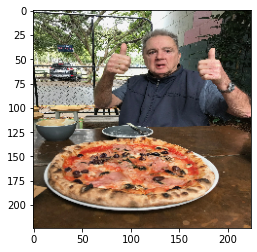

In [ ]:
plt.imshow(img/255.);

In [ ]:
def preprocess_img(filename):
  encoded_image_bytes = tf.io.read_file(filename=filename)
  img = tf.image.decode_image(encoded_image_bytes)
  img = tf.image.resize(img, size=[224, 224])
  return img/255.

In [ ]:
img = preprocess_img("03-pizza-dad.jpeg")

In [ ]:
model.predict(img.numpy().reshape((1, 224, 224, 3)))

array([[0.4950975]], dtype=float32)

In [ ]:
model.predict(tf.expand_dims(img, axis=0))

array([[0.4950975]], dtype=float32)

### Data augmentaion 

In [28]:
from tensorflow.keras.preprocessing import image
train_gen = image.ImageDataGenerator(rescale=1/255, horizontal_flip=True, width_shift_range=0.3)
train_scaled_augmented = train_gen.flow_from_directory(directory="pizza_steak/train", target_size=(224, 224), class_mode='binary', batch_size=32)

# test_gen = image.ImageDataGenerator(rescale=1/255)
# test_scaled = train_gen.flow_from_directory(directory="pizza_steak/test", target_size=(224, 224), class_mode='binary', batch_size=32)

FileNotFoundError: ignored

In [29]:
model.fit(train_scaled_augmented, epochs=5, validation_data=test_scaled)

NameError: ignored

### Multiclass classification

In [30]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-07-06 10:45:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   153MB/s    in 3.2s    

2022-07-06 10:45:37 (153 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [31]:
import zipfile 
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [32]:
# exploring our data 
import os
import numpy as np
# classes that are in the train and test 
train_classes =os.listdir("10_food_classes_all_data/train")
os.listdir("10_food_classes_all_data/test")
#
train_path = "10_food_classes_all_data/train"
train_nb_category_per_class = [len(os.listdir(f"{train_path}/{category}")) for category in train_classes]
for a in zip(train_classes, train_nb_category_per_class):
  print(a)
  break
# methode 2 
np.c_[train_classes, train_nb_category_per_class]

('ramen', 750)


array([['ramen', '750'],
       ['chicken_curry', '750'],
       ['pizza', '750'],
       ['hamburger', '750'],
       ['grilled_salmon', '750'],
       ['chicken_wings', '750'],
       ['steak', '750'],
       ['fried_rice', '750'],
       ['sushi', '750'],
       ['ice_cream', '750']], dtype='<U21')

In [33]:
# easiest methode is to use os.walk 
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directory and {len(filenames)} file in {dirpath}")

There are 2 directory and 0 file in 10_food_classes_all_data
There are 10 directory and 0 file in 10_food_classes_all_data/train
There are 0 directory and 750 file in 10_food_classes_all_data/train/ramen
There are 0 directory and 750 file in 10_food_classes_all_data/train/chicken_curry
There are 0 directory and 750 file in 10_food_classes_all_data/train/pizza
There are 0 directory and 750 file in 10_food_classes_all_data/train/hamburger
There are 0 directory and 750 file in 10_food_classes_all_data/train/grilled_salmon
There are 0 directory and 750 file in 10_food_classes_all_data/train/chicken_wings
There are 0 directory and 750 file in 10_food_classes_all_data/train/steak
There are 0 directory and 750 file in 10_food_classes_all_data/train/fried_rice
There are 0 directory and 750 file in 10_food_classes_all_data/train/sushi
There are 0 directory and 750 file in 10_food_classes_all_data/train/ice_cream
There are 10 directory and 0 file in 10_food_classes_all_data/test
There are 0 dire

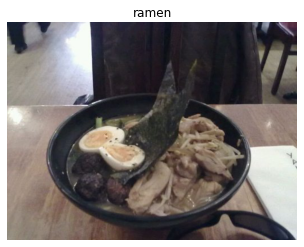

In [34]:
# visulaize data randomly 
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
def visulize_dataset(dir_path): 
  class_names =  os.listdir(dir_path)
  random_class = random.choice(class_names)
  random_image = random.choice(os.listdir(f"{dir_path}/{random_class}"))
  img = mpimg.imread(f"{dir_path}/{random_class}/{random_image}")
  plt.imshow(img)
  plt.axis(False)
  plt.title(random_class);
visulize_dataset("10_food_classes_all_data/test")

### preprocessing  

In [35]:
from tensorflow.keras.preprocessing import image

In [68]:
train_gen = image.ImageDataGenerator(rescale=1/255.)
train_scaled = train_gen.flow_from_directory("10_food_classes_all_data/train",target_size=(224,224),class_mode='categorical',shuffle=True)

test_scaled = image.ImageDataGenerator(rescale=1/255.)
test_scaled = train_gen.flow_from_directory("10_food_classes_all_data/test",target_size=(224,224),class_mode='categorical',shuffle=True, seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [37]:
train_scaled.next()
train_scaled.total_batches_seen

1

In [38]:
train_scaled.class_indices

{'chicken_curry': 0,
 'chicken_wings': 1,
 'fried_rice': 2,
 'grilled_salmon': 3,
 'hamburger': 4,
 'ice_cream': 5,
 'pizza': 6,
 'ramen': 7,
 'steak': 8,
 'sushi': 9}

In [39]:
class_names = np.array(list(dict.keys(train_scaled.class_indices)))

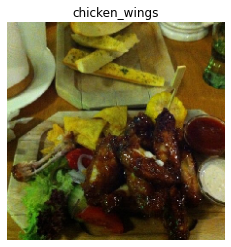

In [40]:
for batch_imgs, batch_labels in train_scaled:
  img = batch_imgs[0]
  label = np.array(batch_labels[0]).argmax()
  title = class_names[label]
  plt.imshow(img)
  plt.title(title)
  plt.axis('off')
  break

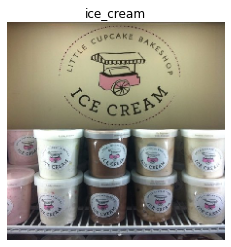

In [41]:
batch_imgs, batch_labels = train_scaled.next()
img = batch_imgs[0]
label = np.array(batch_labels[0]).argmax()
title = class_names[label]
plt.imshow(img)
plt.title(title)
plt.axis('off');

In [42]:
train_scaled.class_indices == test_scaled.class_indices

True

### Creating a model 

In [43]:
import tensorflow as tf

In [44]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [56]:
tf.random.set_seed(42)
# Creating a model 
model = tf.keras.Sequential([
                             Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu", input_shape=(224,224,3)),
                             MaxPool2D(pool_size=2),
                             Flatten(),
                             Dense(10, activation="softmax")
])
# Compile the  model 
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
# fit the model 
model.fit(train_scaled, epochs=5, verbose=1, validation_data=test_scaled, )

Epoch 1/5
235/235 [==============================] - 45s 190ms/step - loss: 2.7128 - accuracy: 0.2296 - val_loss: 2.0141 - val_accuracy: 0.2836
Epoch 2/5
235/235 [==============================] - 44s 189ms/step - loss: 1.5974 - accuracy: 0.4853 - val_loss: 2.0003 - val_accuracy: 0.3028
Epoch 3/5
235/235 [==============================] - 45s 192ms/step - loss: 0.8433 - accuracy: 0.7665 - val_loss: 2.0565 - val_accuracy: 0.3332
Epoch 4/5
235/235 [==============================] - 45s 191ms/step - loss: 0.3227 - accuracy: 0.9371 - val_loss: 2.3784 - val_accuracy: 0.3100
Epoch 5/5
235/235 [==============================] - 46s 195ms/step - loss: 0.1145 - accuracy: 0.9864 - val_loss: 2.6226 - val_accuracy: 0.3024


In [48]:
# overfitting
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, None)              0         
                                                                 
 dense_8 (Dense)             (None, 10)                1232110   
                                                                 
Total params: 1,232,390
Trainable params: 1,232,390
Non-trainable params: 0
_________________________________________________________________


In [51]:
y_true = test_scaled.labels

In [52]:
temp = test_scaled.labels

In [55]:
sum(temp != y_true)

0

In [69]:
y_pred = model.predict(test_scaled).argmax(axis=1)

In [70]:
y_pred

array([6, 6, 8, ..., 2, 2, 6])

In [71]:
temp = model.predict(test_scaled).argmax(axis=1)

In [72]:
temp == y_pred
# whyy 

array([False, False, False, ..., False, False, False])

In [46]:
!nvidia-smi

Wed Jul  6 10:47:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    29W /  70W |   1848MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [77]:
tf.random.set_seed(42)
# a better model cnn explainer to remove overfitting 
model = tf.keras.Sequential([
                             Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),

                             Conv2D(10, 3, activation="relu"),
                             MaxPool2D(),

                             Conv2D(10, 3, activation="relu"),
                             MaxPool2D(),

                             Conv2D(10, 3, activation="relu"),
                             MaxPool2D(),

                             Flatten(),
                             Dense(10, activation="softmax")
])
# comile the model 
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
# fit the model 
model.fit(train_scaled, epochs=10, verbose=1, validation_data=test_scaled)

Epoch 1/10
235/235 [==============================] - 55s 229ms/step - loss: 2.1276 - accuracy: 0.2203 - val_loss: 1.9711 - val_accuracy: 0.2876
Epoch 2/10
235/235 [==============================] - 46s 197ms/step - loss: 1.8972 - accuracy: 0.3351 - val_loss: 1.8548 - val_accuracy: 0.3720
Epoch 3/10
235/235 [==============================] - 53s 224ms/step - loss: 1.7343 - accuracy: 0.4120 - val_loss: 1.8408 - val_accuracy: 0.3640
Epoch 4/10
235/235 [==============================] - 52s 223ms/step - loss: 1.5516 - accuracy: 0.4760 - val_loss: 1.8746 - val_accuracy: 0.3584
Epoch 5/10
235/235 [==============================] - 62s 265ms/step - loss: 1.3652 - accuracy: 0.5436 - val_loss: 1.9091 - val_accuracy: 0.3732
Epoch 6/10
235/235 [==============================] - 49s 209ms/step - loss: 1.1134 - accuracy: 0.6236 - val_loss: 2.1506 - val_accuracy: 0.3520
Epoch 7/10
235/235 [==============================] - 53s 224ms/step - loss: 0.8764 - accuracy: 0.7137 - val_loss: 2.4684 - val_ac

In [78]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2022-07-06 11:34:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.05s   

2022-07-06 11:34:31 (30.1 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]



In [83]:
# predicting a single image 
def preprocess_img(path_to_img):
  encoded_image_bytes = tf.io.read_file(filename=path_to_img)
  img = tf.image.decode_image(encoded_image_bytes)
  img = tf.image.resize(img, size=[224, 224])
  return img/255.

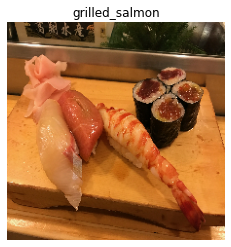

In [92]:
preprocesed_img = preprocess_img("03-sushi.jpeg")
title = class_names[model.predict(preprocesed_img.numpy().reshape(1, 224, 224, 3)).argmax()]
plt.imshow(preprocesed_img)
plt.title(title)
plt.axis(False);